<a href="https://colab.research.google.com/github/Santiago-prog/Percepci-n-Computacional---eje-1/blob/main/Laboratorio%3A%20Eliminaci%C3%B3n%20de%20anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Laboratorio: Eliminación de anomalías

## Introducción

Se intenta dar una solución única y genérica, para la corrección del balance de color de una imagen dada.

## Motivación

La falta de conocimientos y motivación o exceso de confianza en los sistemas automáticos de balance de
color, hacen que cuando el balance de blancos falla sea necesario una corrección antes de pasar a siguientes
niveles de análisis de la imagen. En esta practica se han utilizado imágenes artísticas, aunque en el ambiente
industrial también sucede al alcanzar haces de luz no esperados (por ejemplo, la solar o destellos de
soldadura) en la zona de fotografía que hacen fallar el sistema de visión.
## Solución
Para ello se analizarán los histogramas de los canales de color. Presuponemos que el problema viene por un
desequilibrio entre los tres histogramas.
El objetivo es equilibrar esa relación entre histogramas expandiéndolos de forma equivalente desde 0 a 255.
Para realizar esto, el primer paso es localizar dónde está la mayor parte de la información a través de localizar
los percentiles 1 y 99 de los pixeles (y sus intensidades). He llegado a esos valores tras moverme entre 0,5%
y 5%. Con valores inferiores, apenas se modificaba la imagen, dado que las intensidades de los pixeles de los
percentiles 0,1 estaban ya muy próximos a los externos y apenas se podía mover el histograma y con valores
superiores se generaban exceso de pixeles saturados a 0 o 255.
Localizada la información se desplaza a 0 restando el valor de intensidad del percentil 1 y se corrigen valores
negativos llevándolos a 0.
Ahora solo queda expandir el histograma ya desplazado a 0, multiplicándolo por 255 y dividirlo por la
intensidad del percentil 99 de pixeles. Al realizarlo con diferentes imágenes, en todas aparecen errores en
los pixeles que deberían ser blancos. Este error se ha corregido en vez de escalara 255, probando valores
entre 175 y 255, quedando 200 como valor de compromiso entre un buen resultado y una intervención
agresiva.
En otra línea he probado el resultado de expandir el histograma como conjunte de tres, buscando el mínimo
y máximo de los tres, pero sin resultados interesantes, dado que se mantienen las relaciones entre colores.
Otra línea de trabajo que se siguió, pero se descartó por no influir en el resultado es eliminar el efecto que
se aprecia en los histogramas intervenidos donde valores de intensidad pasan a no tener presencia o
acumular un pico de incidencia muy superior a previsible por los valores del histograma original. Este efecto
creo que tiene origen en el escalado, trabajando con decimales que se truncan para pasar a un valor entero
entre 0 y 255 provocando el efecto de que valores concretos desaparezcan sistemáticamente por sus valores
de intensidad adyacentes. Este efecto afea el resultado del histograma, pero creo despreciable en la imagen
resultado. Véanse los histogramas de los gráficos 2 y 3. 
## Algoritmo

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
original = cv2.imread(‘original.jpg')
resultado = cv2.imread(‘original.jpg')
pixeles = resultado.shape[0] * resultado.shape[1]
canal_rojo = cv2.calcHist([resultado], [0], None, [256], [0, 256])
canal_verde = cv2.calcHist([resultado], [1], None, [256], [0, 256])
canal_azul = cv2.calcHist([resultado], [2], None, [256], [0, 256])
total_canal_rojo = 0
total_canal_verde = 0
total_canal_azul = 0
percentil_inferior = 0.01
percentil_superior = 1 - percentil_inferior
percentil_rojo_inferior = 0
percentil_rojo_superior = 0
percentil_verde_inferior = 0
percentil_verde_superior = 0
percentil_azul_inferior = 0
percentil_azul_superior = 0
percentil_rojo_inferior_localizado = 0
percentil_rojo_superior_localizado = 0
percentil_verde_inferior_localizado = 0
percentil_verde_superior_localizado = 0
percentil_azul_inferior_localizado = 0
percentil_azul_superior_localizado = 0
coef = 200

for i in range (256):
 total_canal_rojo = int(total_canal_rojo + canal_rojo[i])
 total_canal_verde = int(total_canal_verde + canal_verde[i])
 total_canal_azul = int(total_canal_azul + canal_azul[i])
 if total_canal_rojo >= percentil_inferior * pixeles and percentil_rojo_inferior_localizado == 0:
 percentil_rojo_inferior = i;
 percentil_rojo_inferior_localizado = 1;
 if total_canal_rojo >= percentil_superior * pixeles and percentil_rojo_superior_localizado == 0:
 percentil_rojo_superior = i
 percentil_rojo_superior_localizado = 1;
 if total_canal_verde >= percentil_inferior * pixeles and percentil_verde_inferior_localizado == 0:
 percentil_verde_inferior = i
 percentil_verde_inferior_localizado = 1;
 if total_canal_verde >= percentil_superior * pixeles and percentil_verde_superior_localizado == 0:
 percentil_verde_superior = i
 percentil_verde_superior_localizado = 1;
 if total_canal_azul >= percentil_inferior * pixeles and percentil_azul_inferior_localizado == 0:
 percentil_azul_inferior = i
 percentil_azul_inferior_localizado = 1;
 if total_canal_azul >= percentil_superior * pixeles and percentil_azul_superior_localizado == 0:
 percentil_azul_superior = i
 percentil_azul_superior_localizado = 1;
for x in range(resultado.shape[0]): 
 for y in range(resultado.shape[1]):
 if resultado[x,y][0] >= percentil_rojo_inferior: resultado[x,y][0] = resultado[x,y][0] - percentil_rojo_inferior
 if resultado[x,y][1] >= percentil_verde_inferior: resultado[x,y][1] = resultado[x,y][1] - percentil_verde_inferior
 if resultado[x,y][2] >= percentil_azul_inferior: resultado[x,y][2] = resultado[x,y][2] - percentil_azul_inferior
 if resultado[x,y][0] < 0:
 print (x,',',y, ' es ',resultado[x,y][0])
 resultado[x,y][0] = 0
 if resultado[x,y][1] < 0:
 print (x,',',y, ' es ',resultado[x,y][1])
 resultado[x,y][1] = 0
 if resultado[x,y][2] < 0:
 print (x,',',y, ' es ',resultado[x,y][2])
 resultado[x,y][2] = 0
 resultado[x,y][0] = int(coef * resultado[x,y][0] / (percentil_rojo_superior-percentil_rojo_inferior))
 resultado[x,y][1] = int(coef * resultado[x,y][1] / (percentil_verde_superior-percentil_verde_inferior))
 resultado[x,y][2] = int(coef * resultado[x,y][2] / (percentil_azul_superior-percentil_azul_inferior))
 if resultado[x,y][0] > 255:
 print (x,',',y, ' es ',resultado[x,y][0])
 resultado[x,y][0] = 255
 if resultado[x,y][1] > 255:
 print (x,',',y, ' es ',resultado[x,y][1])
 resultado[x,y][1] = 255
 if resultado[x,y][2] > 255:
 print (x,',',y, ' es ',resultado[x,y][2])
 resultado[x,y][2] = 255
canal_rojo2 = cv2.calcHist([resultado], [0], None, [256], [0, 256])
canal_verde2 = cv2.calcHist([resultado], [1], None, [256], [0, 256])
canal_azul2 = cv2.calcHist([resultado], [2], None, [256], [0, 256])
plt.plot(canal_rojo, color='R' )
plt.plot(canal_verde, color='G' )
plt.plot(canal_azul, color='B' )
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()
plt.plot(canal_rojo2, color='R' )
plt.plot(canal_verde2, color='G' )
plt.plot(canal_azul2, color='B' )
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()
union = np.concatenate((original, resultado), axis=1) # axis = 0 vertical 1 horizontal
cv2.imshow('imagenes',union)
cv2.imwrite('resultado.jpg', union)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Conclusiones
Aparte del correcto funcionamiento del algoritmo, se ha visto que es necesario un factor de corrección para
no alcanzar valores próximos a 255 por deformar la imagen, el quitar ese factor no presenta valores extraños
en el histograma, pero sí en la imagen resultado final.
También se observa que imágenes con trastornos en el balance de blanco con presencia de objetos blancos
y/o negros dan mejores resultados. Esto nos puede llevar a sugerir añadir elementos blancos y negros en las
fotografías de visión artificial en industria, aunque sea fuera del foco de trabajo, para en caso de necesitar
realizar esta operación existan áreas de referencia. 
Queda probar, la posibilidad de no expandir el histograma al rango de 0 a 255, que además da problemas,
sino expandir y mover dos de ellos (los menos amplios) a los límites del más extenso, sin siquiera moverlo a
valores de intensidad 0. Posiblemente los resultados sean más naturales, sin que aparezcan negros tan
saturados como en la figura 2.


[Figura 1](https://drive.google.com/file/d/CJSB3z7k-orrMVsnoY1aI_uVzy6vSOGe/view?usp=sharing)


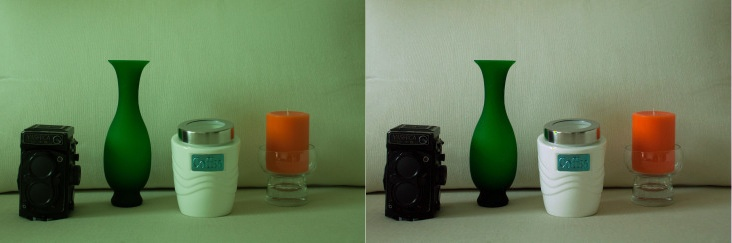

Fig 1. Imagen original a la izquierda y reslutado a la derecha. Como se ve existe un objeto blanco y otro negro, que hacen de límites para la expansión del histograma.

[Figura 2](https://drive.google.com/file/d/1CJSB3z7k-orrMVsnoY1aI_uVzy6vSOGe/view?usp=sharing)		

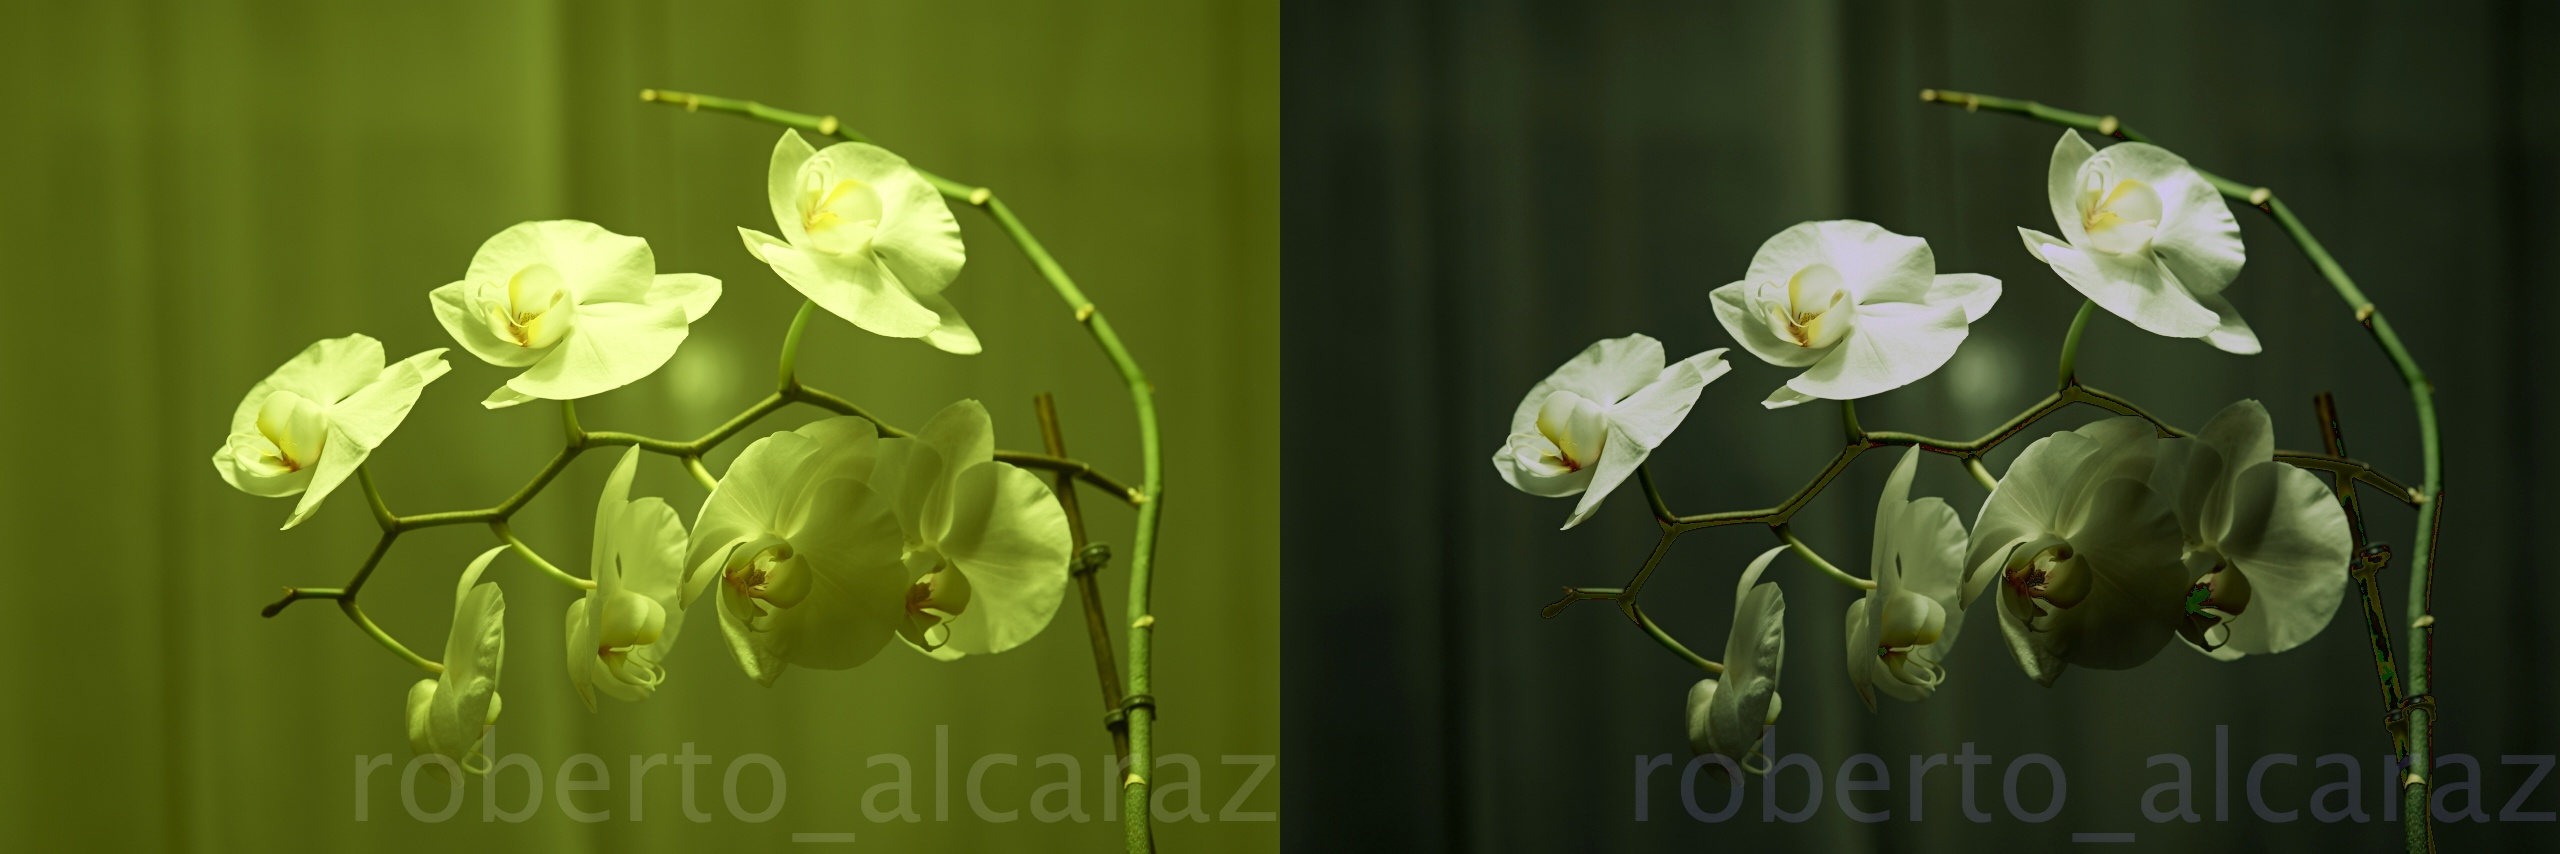

Fig 2. Imagen original a la izquierda y reslutado a la derecha. En esta otra imagen se ve como la flor recupera su color blanco,pero se oscurece la imagen. Aparece un nuevo error, pero se ha corregido el balance de color, que era nuestro objetivo.

[Figura 3](https://drive.google.com/file/d/1kKB_ri_36u4Rfiv3ttWsDDdYiTCFwPw0/view?usp=sharing)	
https://drive.google.com/file/d/1kKB_ri_36u4Rfiv3ttWsDDdYiTCFwPw0/view?usp=sharing
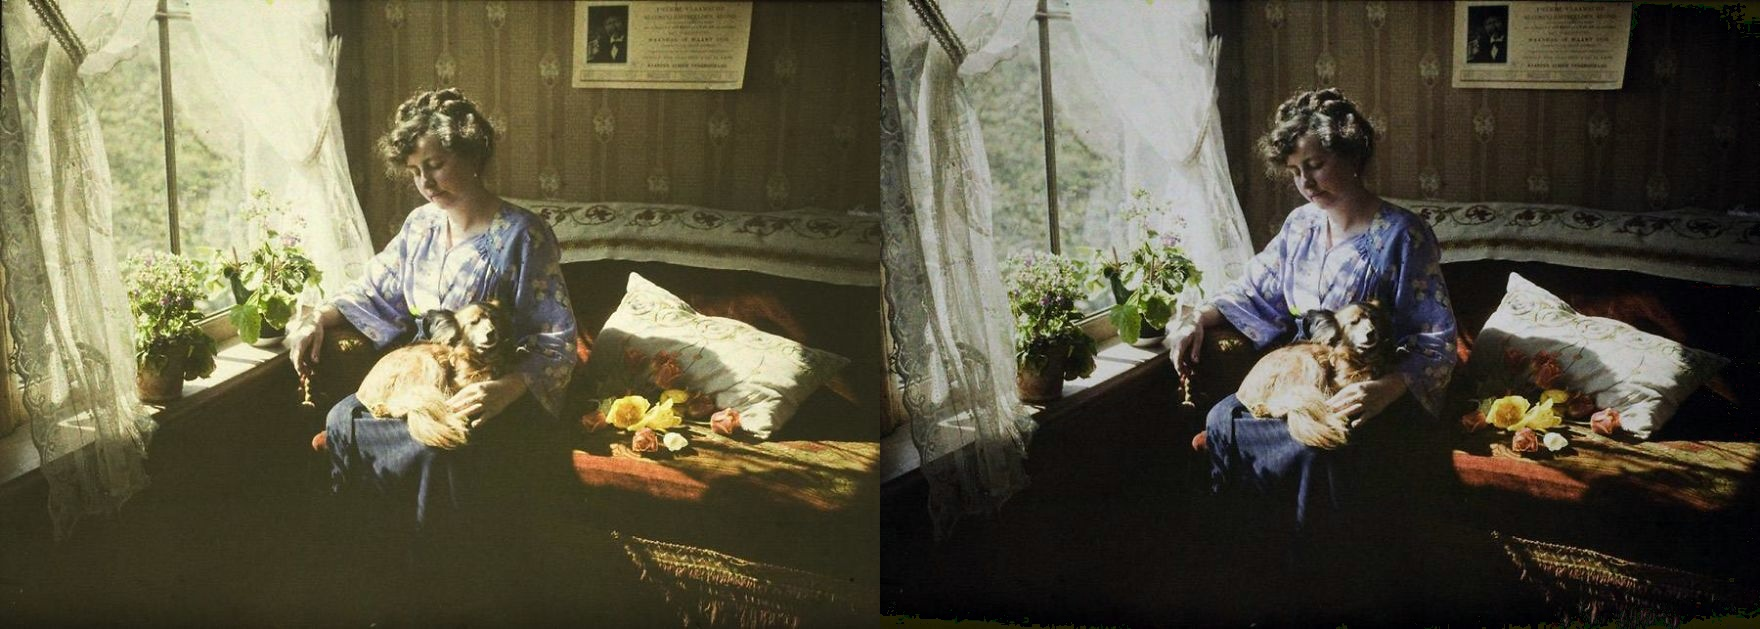
Fig 3. Imagen original a la izquierda y reslutado a la derecha. En esta otra imagen el algoritmo también funciona muy bien (véanse blancos en cortinas y almohada y negro de las zonas oscuras)

[Grafico 1](https://drive.google.com/file/d/1fWjsAIz5rDMy3lrSFumrZnb5dBQQBm-y/view?usp=sharing)		
https://drive.google.com/file/d/1fWjsAIz5rDMy3lrSFumrZnb5dBQQBm-y/view?usp=sharing
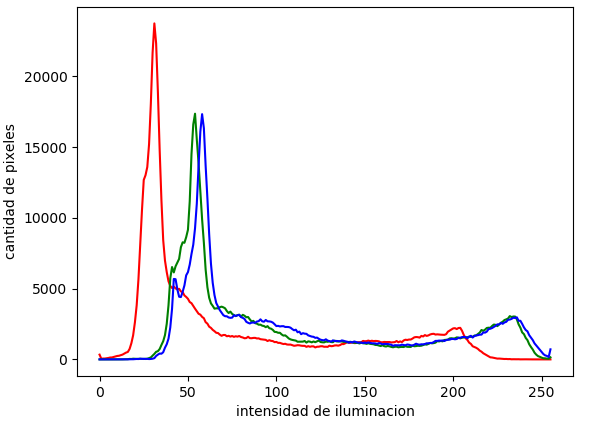
Graf 1. Histograma de la imagen original de la Fig 3. 
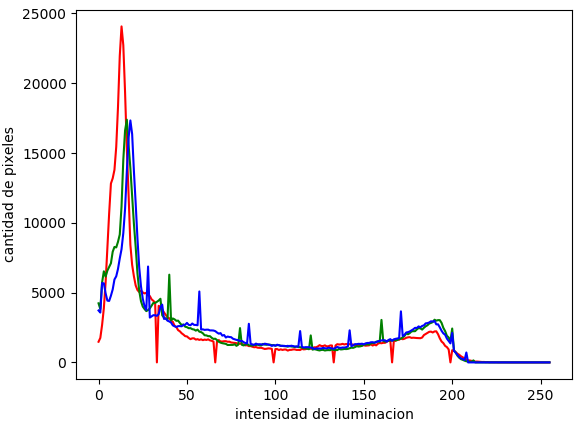
[Grafico 2](https://drive.google.com/file/d/1jF05PHQvpTEFsBGBFFSfNPyU9Z3AgDcy/view?usp=sharing)		
https://drive.google.com/file/d/1jF05PHQvpTEFsBGBFFSfNPyU9Z3AgDcy/view?usp=sharing
Graf 2. Histograma de la imagen trabajada de la Fig 3 con coef = 200. En este histograma se ve claramente que la expansión del histograma no se realiza en los valores 0 a 255. Por el problema indicado (se ve en la siguiente imagen), si alcanzamos con este método los valores próximos a 255, la imagen se desbalancea apareciendo errores en los pixeles blancos.

[Figura 4](https://drive.google.com/file/d/12WYt45c96YA9Dr_3EjF6VojwuQccpucY/view?usp=sharing)	
https://drive.google.com/file/d/12WYt45c96YA9Dr_3EjF6VojwuQccpucY/view?usp=sharing
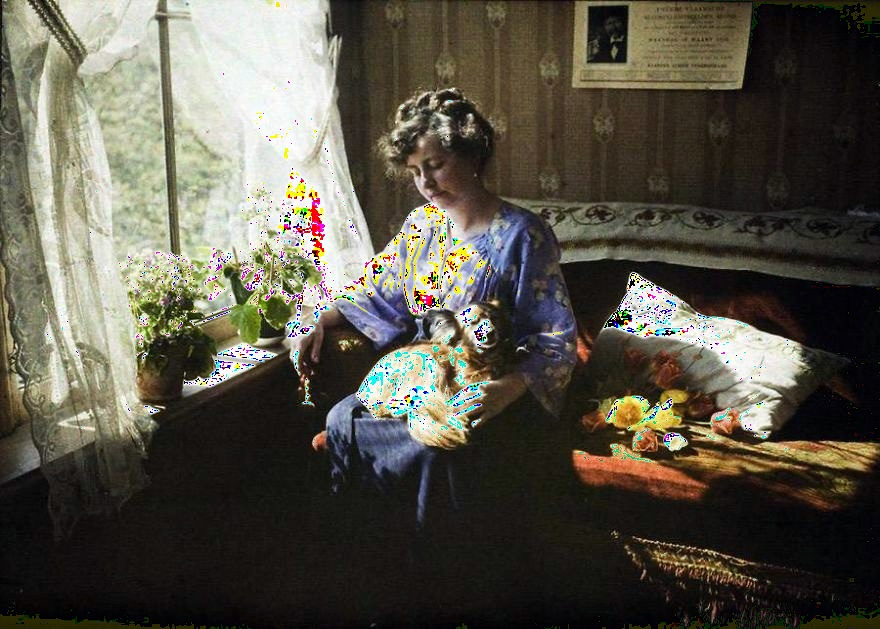
Fig4. Resultado de corrección una intervención errónea sobre la imagen de la Fig 3. 
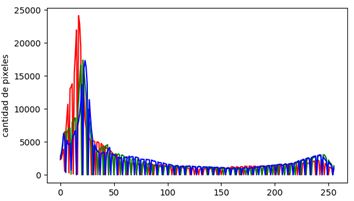
[Grafico 3](https://drive.google.com/file/d/1yeFWncrQh2Bw4gpt409x_w3srlJv59S0/view?usp=sharing)	
https://drive.google.com/file/d/1yeFWncrQh2Bw4gpt409x_w3srlJv59S0/view?usp=sharing
Graf 3. Histograma de la imagen trabajada de la Fig 3 con coef = 255

El código ha sido almacenado en la plataforma GitHub: https://github.com/Santiago-prog/Percepci-nComputacional---eje-1

## Bibliografía
Imagen para la obtención del ensayo visible en figura 1: https://fotografiadslr.wordpress.com/2015/04/15/como-corregir-el-balance-de-blancos-en-menos-de-5-segundos/

Imagen para la obtención del ensayo visible en figura 2: https://www.casanovafoto.com/blog/2014/03/elbalance-de-blancos-y-la-exposicion/

Imagen para la obtención del ensayo visible en figura 3 y 4 y graficos 1, 2 y 3: https://culturainquieta.com/es/foto/item/12186-10-de-las-mas-antiguas-fotografias-en-color-nosmuestran-como-era-el-mundo-hace-100-anos.html